### Small atom

Loading data	7.88 s
Preparing input	
46.51 s
Fitting	522.74 s
pair_coeff	1 1 0   0   0   0   0   0   0   -281484.99756799615  0   0   0   0   0   8850058742.768923  0   



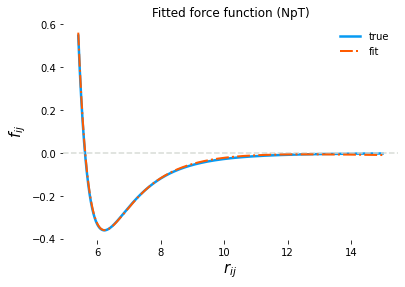

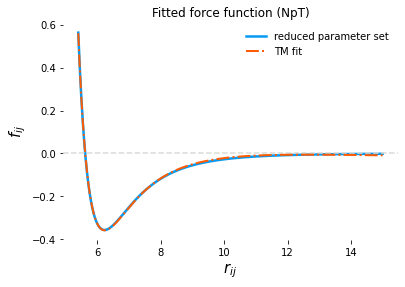

In [1]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 0.75 / x * (2 * (5/x) ** 12 - (5/x) ** 6)
def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p
params = range(-1, -15, -2)

steps_between_points = 3
configurations = 5000
outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/trajectory_match/small_npt.out"
small_atom_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=15,
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

small_atom_tm.prepare_training_data()
small_atom_tm.fit()

x = np.linspace(5.4, 15, 10000)
y_fit = small_atom_tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y) #, thermostat='NpT', output_path="/home/markjenei/polymerisation-coarse-graining/lj_test/small_npt.png")
best_params, best_weights = small_atom_tm.best_subset((-7, -13), x, print_coeffs=True, plot=True)

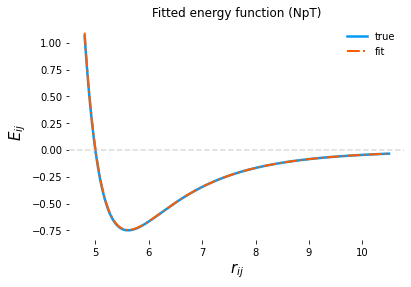

In [5]:
def e_target_function(x):
    return 4 * 0.75  * ((5/x) ** 12 - (5/x) ** 6)

x_fit = np.linspace(5.4, 15, 10000)
x_plot = np.linspace(4.8, 10.5, 10000)
y = small_atom_tm.predict_energy(x_fit, x_plot, best_subset_=(-7, -13))

plot_1component(x_plot, y, e_target_function(x_plot), title="Fitted energy function", y_label=r"$E_{ij}$")

small_atom_tm.write_pair_table(x_fit, 50001, energy_fit_params=(-7, -13),
                               outfile_path="/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/small_pair.table")


In [ ]:
import misc
import matplotlib.pyplot as plt
i = 0 # try self.t = 4 and i = 2 for good gamma explanation (lj_test_gamma_demo.out)

plt.plot(small_atom_tm.r[:, i, 0][0:1000])
r = misc.lowess(small_atom_tm.r[:, i, 0], f=0.075)
plt.show()

v_ = misc.lowess(small_atom_tm.v[:, i, 0][0:1000], f=0.02, iter=5)
plt.plot(small_atom_tm.v[:, i, 0][0:1000])
plt.plot(v_[0:1000])
plt.show()

a_fit = misc.lowess(small_atom_tm.a[:, i, 0][0:1000], f=0.02, iter=5) * 340.42  * small_atom_tm.timestep ** 2

plt.plot(a_fit , label='tm')
plt.axhline(0, color='xkcd:silver', ls=':')
plt.legend()
plt.show()

### Heavy atom

Loading data	8.37 s
Preparing input	148.53 s
Fitting	4960.88 s
pair_coeff	1 1 0   0   0   0   0   0   0   -4229801.025160062  0   0   0   0   0   1503966214580.4668  0   



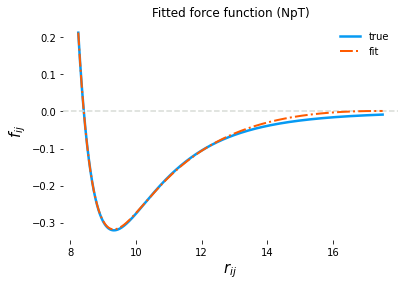

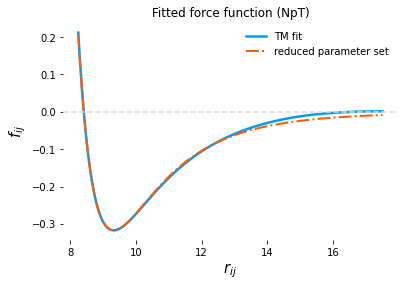

In [2]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_1component

def target_function(x):
    return 24 * 1.0 / x * (2 * (7.5/x) ** 12 - (7.5/x) ** 6)
def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p
params = range(-1, -15, -2)

steps_between_points = 5
configurations = 1000

outfile = "/home/markjenei//polymerisation-coarse-graining/lj_test/trajectory_match/heavy_npt.out"
heavy_atom_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=19,
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

heavy_atom_tm.prepare_training_data()
heavy_atom_tm.fit()

x = np.linspace(8.25, 17.5, 10000)
y_fit = heavy_atom_tm.predict(x)
y = target_function(x)
plot_1component(x, y_fit, y) #, thermostat='NpT', output_path="/home/markjenei/polymerisation-coarse-graining/lj_test/heavy_npt.png")
heavy_atom_tm.best_subset((-7, -13), x, print_coeffs=True)

### Two-atom mix

Loading data	2.32 s
Preparing input	144.31 s
Fitting	1789.96 s


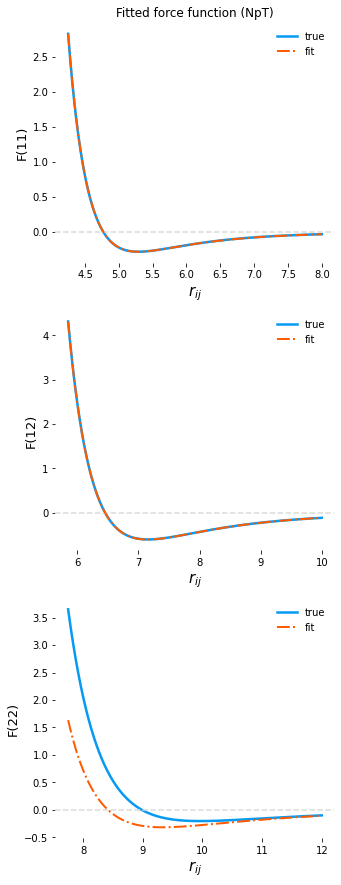

In [5]:
import numpy as np
from trajectory_matching import TrajectoryMatching
from misc import plot_2component

X = [np.linspace(4.25, 8, 1000), np.linspace(5.85, 10, 1000), np.linspace(7.75, 12, 1000)]

def target_function0(x):
    return 24 * 0.50 / x * (2 * (4.25/x) ** 12 - (4.25/x) ** 6)

def target_function1(x):
    return 24 * 1.45 / x * (2 * (5.75/x) ** 12 - (5.75/x) ** 6)

def target_function2(x):
    return 24 * 1.00 / x * (2 * (7.75/x) ** 12 - (7.5/x) ** 6)

def basis_function(x, p):
    return np.sign(x) * np.abs(x) ** p

params = range(-1, -15, -2)

steps_between_points = 3
configurations = 500

outfile = "/home/markjenei/polymerisation-coarse-graining/lj_test/trajectory_match/mixed_npt.out"
mixed_tm = TrajectoryMatching(outfile_path=outfile, basis=basis_function, basis_parameters=params,
                                   simulation_timestep=0.5, cutoff=19,
                                   every_n_from_output=steps_between_points, timesteps_in_fit=configurations)

mixed_tm.prepare_training_data()
mixed_tm.fit()


Y = [target_function0(X[0]), target_function1(X[1]), target_function2(X[2])]
Y_fit = [mixed_tm.predict(X[0])[0], mixed_tm.predict(X[1])[1], mixed_tm.predict(X[2])[2]]
plot_2component(X, Y_fit, Y) #, thermostat='NpT', output_path="/home/markjenei/polymerisation-coarse-graining/lj_test/mix_npt.png")

